# Angry-Relax image classification

## 1.1 Install All Dependencies and Setup
- use pip for install any package

In [2]:
import tensorflow as tf
print(tf.__version__)



2.17.0


In [3]:
import sys
print(sys.version)

3.10.14 | packaged by conda-forge | (main, Mar 20 2024, 12:40:08) [MSC v.1938 64 bit (AMD64)]


In [4]:
import tensorflow as tf
if tf.test.gpu_device_name():
  print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
  print("Please install GPU version of TF")

Please install GPU version of TF


In [5]:
import os

In [6]:
os.listdir()

['.ipynb_checkpoints',
 'angry classification.ipynb',
 'data',
 'logs',
 'model.ipynb',
 'requirements.txt',
 'venv']

In [7]:
# Avoid OOM error by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [8]:
gpus

[]

## 1.2. REmove Dodgy images

In [9]:
## imports
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [10]:
data_dir = 'data'
image_extensions = ['jpeg','jpg','bmp', 'png']

In [11]:
os.listdir(data_dir)

['angry', 'relaxed']

In [12]:
os.listdir(os.path.join(data_dir, 'angry'))

['-woman-against-background-of-crowd-of-angry-people-with-fire-on-street-photo.jpg',
 '10-105059_angry-person-transparent-images-png-angry-person-transparent.png',
 '1000_F_233007798_QWxNPHc72uo3bwB6yL8z50tYKlDAFP5V.jpg',
 '139-1393790_angry-person-png-pic-angry-man-clipart-png.png',
 '18157917-five-angry-young-people-shout-and-wave-their-arms.jpg',
 '19_1016_DISCIPLESHIP_How-to-Deal-With-Angry-People_1021x640.jpg',
 '1w25F3sR1kwAJx6G6xnFUQA.jpeg',
 '231106-anger-stock-mb-1441-8d0d27.jpg',
 '360_F_197667405_ZWvFfmYWXANFZjUBumNvwcp9dr8Vcfb1.jpg',
 '360_F_220427132_eI9ZxwmFNFdzvLF5zlKxdAiaSadXGD3k.jpg',
 '5-53664_angry-person-png-transparent-png.png',
 '5-55393_angry-person-png-photo-angry-person-png-transparent.png',
 '5-55846_angry-people-png-transparent-images-standing-png-download.png',
 '5-56573_shout-angry-person-png-png-transparent-png.png',
 '60552212-angry-people-illustration-design-collection.jpg',
 '68-688804_angry-person-png-images-angry-man-transparent-png.png',
 'AF2bZyiypw

In [13]:
cv2.imread(os.path.join(data_dir, 'angry', 'images39.jpg'))

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [241, 241, 241],
        [234, 234, 234]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [241, 241, 241],
        [234, 234, 234]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [241, 241, 241],
        [234, 234, 234]],

       ...,

       [[238, 238, 238],
        [238, 238, 238],
        [238, 238, 238],
        ...,
        [245, 244, 246],
        [248, 248, 248],
        [253, 253, 253]],

       [[239, 239, 239],
        [239, 239, 239],
        [239, 239, 239],
        ...,
        [241, 240, 242],
        [253, 253, 253],
        [255, 255, 255]],

       [[239, 239, 239],
        [239, 239, 239],
        [239, 239, 239],
        ...,
        [241, 240, 242],
        [253, 253, 253],
        [255, 255, 255]]

In [14]:
# opencv method "imread" gives array for image values between 0 to 255.
sample_img = cv2.imread(os.path.join(data_dir, 'angry', 'images39.jpg'))
sample_img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [241, 241, 241],
        [234, 234, 234]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [241, 241, 241],
        [234, 234, 234]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [241, 241, 241],
        [234, 234, 234]],

       ...,

       [[238, 238, 238],
        [238, 238, 238],
        [238, 238, 238],
        ...,
        [245, 244, 246],
        [248, 248, 248],
        [253, 253, 253]],

       [[239, 239, 239],
        [239, 239, 239],
        [239, 239, 239],
        ...,
        [241, 240, 242],
        [253, 253, 253],
        [255, 255, 255]],

       [[239, 239, 239],
        [239, 239, 239],
        [239, 239, 239],
        ...,
        [241, 240, 242],
        [253, 253, 253],
        [255, 255, 255]]

In [15]:
type(sample_img)

numpy.ndarray

In [16]:
sample_img.shape

(194, 259, 3)

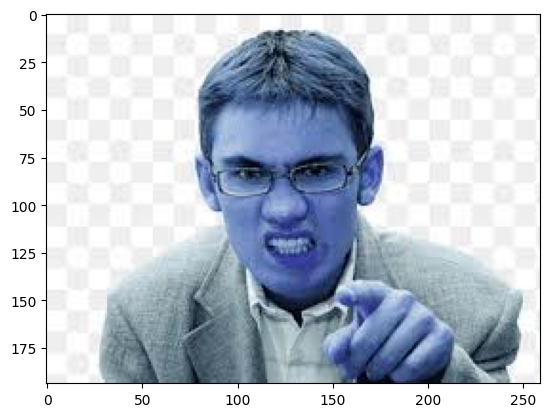

In [17]:
plt.imshow(sample_img)

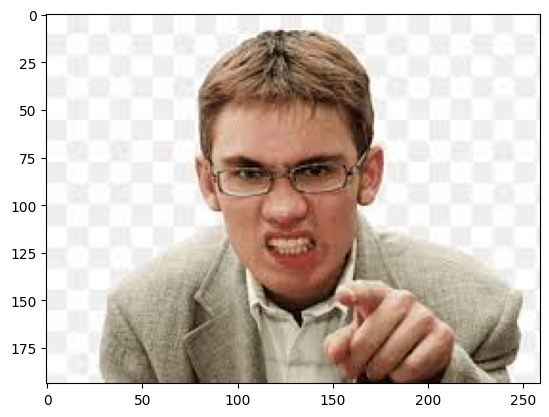

In [18]:
plt.imshow(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))
plt.show()

In [19]:
# remove images which dont have above extensions
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path) # gives np.array for image
            tip = imghdr.what(image_path)
            if tip not in image_extensions:
                print(f'Image not in extension list {image_path}.')
                os.remove(image_path)
        except Exception as e:
            print(f"Issue with image {image_path}.")
           # os.remove(image_path)

KeyboardInterrupt: 

## 1.3. Load Data

In [25]:
tf.keras.utils.image_dataset_from_directory('data')

Found 310 files belonging to 2 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [26]:

# import our data from folder
data = tf.keras.utils.image_dataset_from_directory('data')

Found 310 files belonging to 2 classes.


In [27]:
type(data)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [46]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [28]:
data_iterator = data.as_numpy_iterator()

In [29]:
batch = data_iterator.next()

In [30]:
batch

(array([[[[189.      , 202.      , 210.      ],
          [189.      , 202.      , 210.      ],
          [189.      , 202.      , 210.      ],
          ...,
          [193.      , 207.      , 208.      ],
          [193.54492 , 206.81836 , 208.      ],
          [196.      , 206.      , 208.      ]],
 
         [[189.81836 , 202.81836 , 210.81836 ],
          [189.81836 , 202.81836 , 210.81836 ],
          [189.81836 , 202.81836 , 210.81836 ],
          ...,
          [193.      , 207.      , 208.      ],
          [193.54492 , 206.81836 , 208.      ],
          [196.      , 206.      , 208.      ]],
 
         [[190.      , 203.      , 211.      ],
          [190.      , 203.      , 211.      ],
          [190.      , 203.      , 211.      ],
          ...,
          [193.      , 207.      , 208.      ],
          [193.54492 , 206.81836 , 208.      ],
          [196.      , 206.      , 208.      ]],
 
         ...,
 
         [[104.78906 , 153.78906 , 158.78906 ],
          [105.036

In [31]:
len(batch)

2

In [33]:
# these are numpy arrays represents images
batch[0].shape

(32, 256, 256, 3)

In [35]:
batch[0]

array([[[[189.      , 202.      , 210.      ],
         [189.      , 202.      , 210.      ],
         [189.      , 202.      , 210.      ],
         ...,
         [193.      , 207.      , 208.      ],
         [193.54492 , 206.81836 , 208.      ],
         [196.      , 206.      , 208.      ]],

        [[189.81836 , 202.81836 , 210.81836 ],
         [189.81836 , 202.81836 , 210.81836 ],
         [189.81836 , 202.81836 , 210.81836 ],
         ...,
         [193.      , 207.      , 208.      ],
         [193.54492 , 206.81836 , 208.      ],
         [196.      , 206.      , 208.      ]],

        [[190.      , 203.      , 211.      ],
         [190.      , 203.      , 211.      ],
         [190.      , 203.      , 211.      ],
         ...,
         [193.      , 207.      , 208.      ],
         [193.54492 , 206.81836 , 208.      ],
         [196.      , 206.      , 208.      ]],

        ...,

        [[104.78906 , 153.78906 , 158.78906 ],
         [105.036804, 152.40009 , 158.21844 ]

In [34]:
# labels of images (angry and relaxed)
batch[1]

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0], dtype=int32)

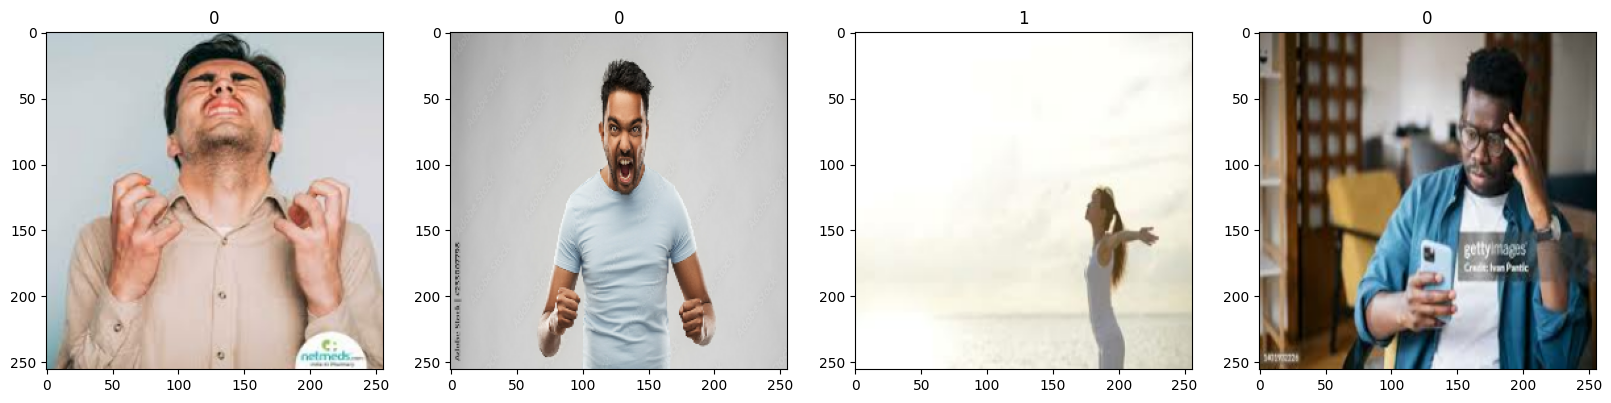

In [38]:
# lets se which tag or lebel is for which class(angry or relaxed)
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for index , image in enumerate(batch[0][:4]):
    ax[index].imshow(image.astype(int))
    ax[index].set_title(batch[1][index])

In [40]:
# lets check for other batch
batch2 = data_iterator.next()
print(batch2[0].shape)

(32, 256, 256, 3)


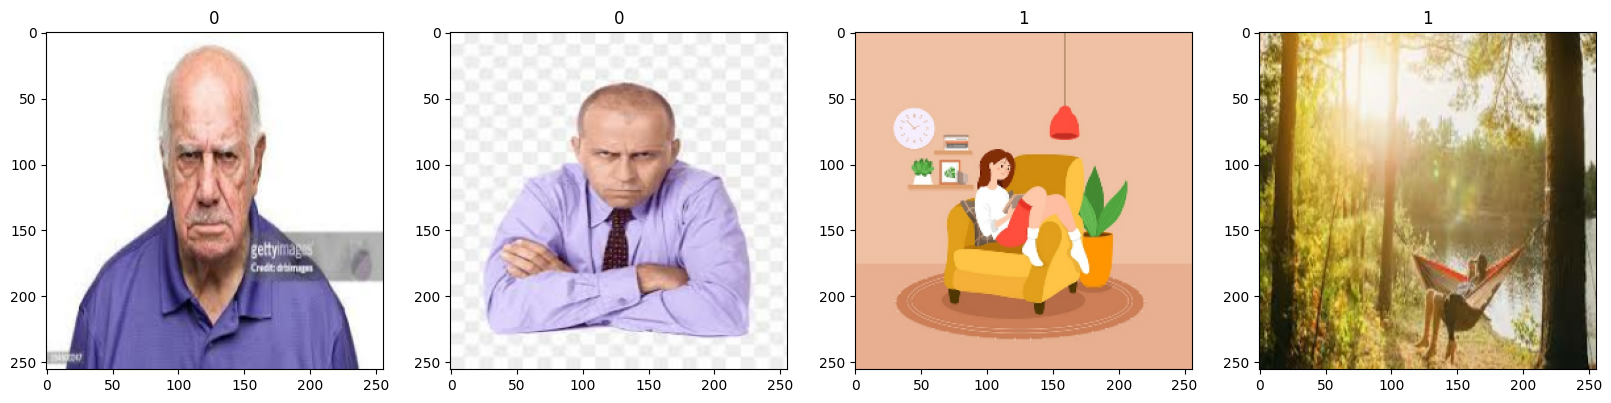

In [41]:
# lets se which tag or lebel is for which class(angry or relaxed) in batch2
fig, ax = plt.subplots(ncols = 4, figsize=(20,20))
for index , image in enumerate(batch2[0][:4]):
    ax[index].imshow(image.astype(int))
    ax[index].set_title(batch2[1][index])

#### here labels are as 1 for RElaxed and 0 for Angry

In [42]:
# lowest value in data is 0
batch[0].min()

0.0

In [43]:
# highest value in data is 255
batch[0].max()

255.0

In [44]:
# now scale data by deviding 255, it makes min is 0 and max is 1
scaled_images_array = batch[0]/255

In [45]:
scaled_images_array.min(), scaled_images_array.max()

(0.0, 1.0)

## 2. Preprocessing
## 2.2. Scale Data







In [49]:
# we know that our data has 2 features,
# one is image tensor and other is label tensor
# following line scale our data to in between 0 to 1, and label still remain same
data = data.map(lambda x,y: (x/255, y))

In [51]:
scaled_data_iterator = data.as_numpy_iterator()

In [52]:
scaled_data_iterator.next()[0].min()

0.0

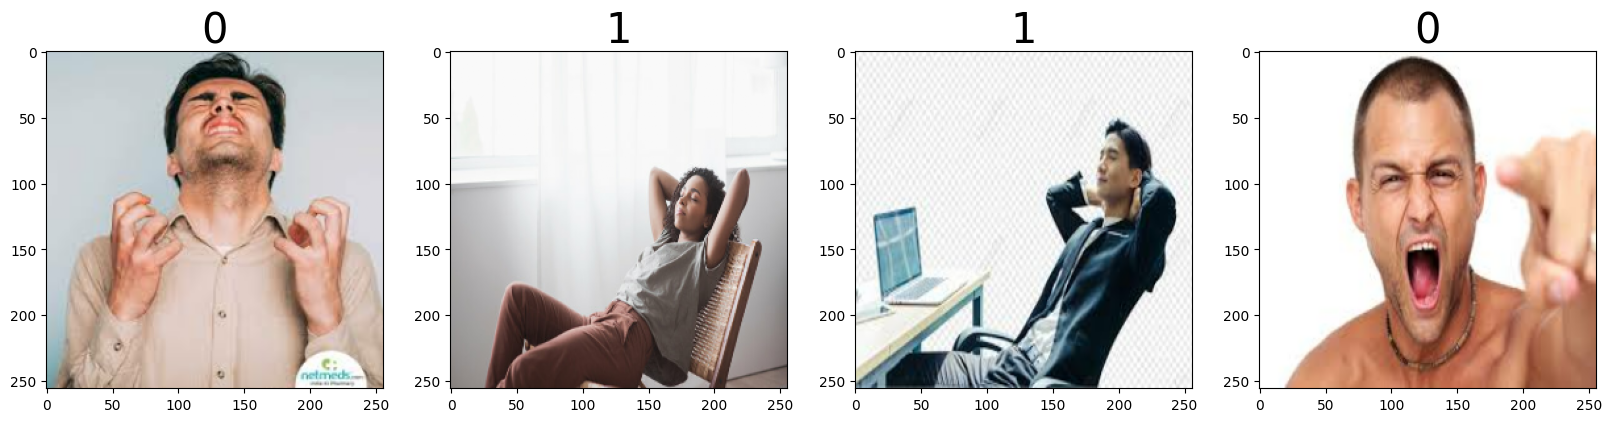

In [53]:
scaled_batch = scaled_data_iterator.next()
fig , ax = plt.subplots(ncols=4, figsize=(20, 20))
for index, image in enumerate(scaled_batch[0][:4]):
    ax[index].imshow(image)
    ax[index].set_title(scaled_batch[1][index], size= 30)

In [55]:
scaled_batch[0].min(), scaled_batch[0].max()

(0.0, 1.0)

In [56]:
scaled_batch[1]

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int32)

## 2.2. Split data

In [57]:
len(data)

10

In [58]:
data


<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [63]:
import tensorflow as tf

def split_dataset(dataset, train_ratio=0.7, val_ratio=0.2):
  """
  Splits a tf.data.Dataset into train, validation, and test sets.

  Args:
    dataset: The tf.data.Dataset to split.
    train_ratio: The proportion of data to use for training.
    val_ratio: The proportion of data to use for validation.

  Returns:
    train_dataset: tf.data.Dataset for training.
    val_dataset: tf.data.Dataset for validation.
    test_dataset: tf.data.Dataset for testing.
  """
  dataset_size = len(list(dataset))
  train_size = int(train_ratio * dataset_size)
  val_size = int(val_ratio * dataset_size)

  train_dataset = dataset.take(train_size)
  val_dataset = dataset.skip(train_size).take(val_size)
  test_dataset = dataset.skip(train_size + val_size)

  return train_dataset, val_dataset, test_dataset

# Example usage
train_dataset, val_dataset, test_dataset = split_dataset(data)

In [64]:
print(train_dataset.element_spec)
print(test_dataset.element_spec)
print(val_dataset.element_spec)

(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


In [65]:
train_size = len(list(train_dataset))
val_size = len(list(val_dataset))
test_size = len(list(test_dataset))

print("Train size:", train_size)
print("Validation size:", val_size)
print("Test size:", test_size)

Train size: 7
Validation size: 2
Test size: 1


In [66]:
# just check
len(list(data)),len(list(train_dataset)),len(list(val_dataset)),len(list(test_dataset))

(10, 7, 2, 1)

## 3. Deep Learning Model
## 3.1. Model building

In [67]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu',
                input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3),))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=(3,3),))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      29,491,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 88,754,885 (338.57 MB)

 Trainable params: 29,584,961 (112.86 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 59,169,924 (225.72 MB)

In [68]:
# create early stopping
'''
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor (e.g., validation loss)
    patience=3,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)'''

## 3.2. Model training

In [1]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= logdir)

NameError: name 'tf' is not defined

In [74]:
# Train your model and pass the callback
history = model.fit(
    train_dataset,
    epochs=50,
    batch_size= 32,
    validation_data=val_dataset,

)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 474ms/step - accuracy: 0.5499 - loss: 0.7183 - val_accuracy: 0.5156 - val_loss: 0.9382
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 677ms/step - accuracy: 0.6192 - loss: 0.7454 - val_accuracy: 0.8750 - val_loss: 0.3876
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 449ms/step - accuracy: 0.8378 - loss: 0.3757 - val_accuracy: 0.7969 - val_loss: 0.4460
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 493ms/step - accuracy: 0.8747 - loss: 0.3529 - val_accuracy: 0.9688 - val_loss: 0.1816
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 668ms/step - accuracy: 0.9232 - loss: 0.2239 - val_accuracy: 0.9219 - val_loss: 0.2103
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 749ms/step - accuracy: 0.9348 - loss: 0.2408 - val_accuracy: 0.9531 - val_loss: 0.1844
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 602ms/step - accuracy: 0.9427 - loss: 0.1993 - val_accuracy: 0.9688 - val_loss: 0.1453
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 533ms/step - accuracy: 0.9428 - loss: 0.1579 - val_accuracy: 0.9531 - val_loss:

Best epoch: 47


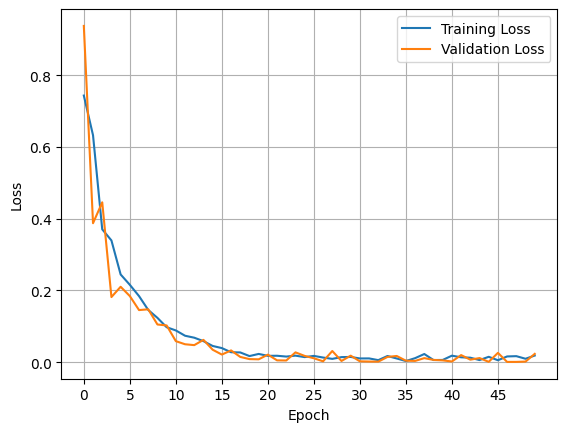

In [76]:


# Access the validation loss history
val_loss = history.history['val_loss']

# Find the epoch with the lowest validation loss
best_epoch = val_loss.index(min(val_loss)) + 1

# Print the best epoch
print(f'Best epoch: {best_epoch}')

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Add gridlines
plt.grid(True)

# Set x-axis ticks with a step of 5
plt.xticks(range(0, len(history.history['loss']), 5))


plt.show()

## 3.3. Model evaluation

In [79]:
# ... (previous code to determine best_epoch) ...

# Evaluate the model at the best epoch
loss = history.history['loss'][best_epoch - 1]
accuracy = history.history['accuracy'][best_epoch - 1]
val_loss = history.history['val_loss'][best_epoch - 1]
val_accuracy = history.history['val_accuracy'][best_epoch - 1]

print(f'Metrics at the best epoch ({best_epoch}):')
print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')
print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

Metrics at the best epoch (47):
Loss: 0.0160, Accuracy: 0.9911
Validation Loss: 0.0007, Validation Accuracy: 1.0000


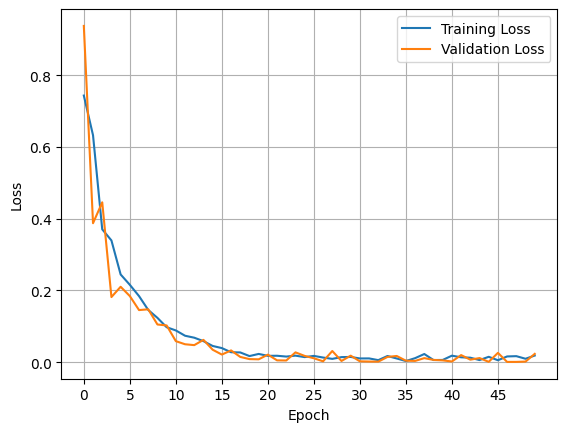

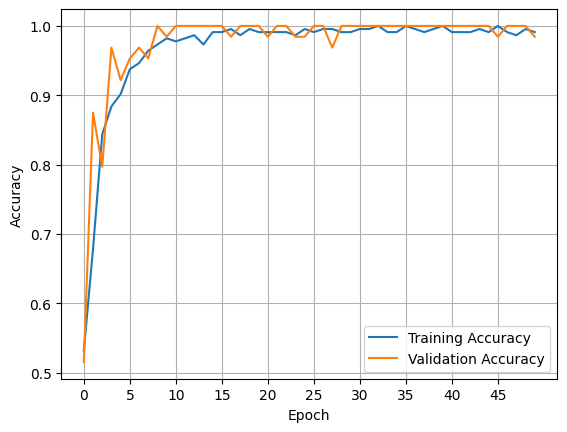

In [82]:
#Plot the metrics:
# Create plots of the training and validation loss and accuracy over all epochs

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# Add gridlines
plt.grid(True)
# Set x-axis ticks with a step of 5
plt.xticks(range(0, len(history.history['val_loss']), 5))
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# Add gridlines
plt.grid(True)
# Set x-axis ticks with a step of 5
plt.xticks(range(0, len(history.history['val_accuracy']), 5))
plt.show()